# Quantile Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AMD'
start = '2014-01-01'
end = '2018-08-27'

# Read data 
dataset = yf.download(symbol,start,end)

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02 00:00:00-05:00,3.85,3.98,3.84,3.95,3.95,20548400
2014-01-03 00:00:00-05:00,3.98,4.00,3.88,4.00,4.00,22887200
2014-01-06 00:00:00-05:00,4.01,4.18,3.99,4.13,4.13,42398300
2014-01-07 00:00:00-05:00,4.19,4.25,4.11,4.18,4.18,42932100
2014-01-08 00:00:00-05:00,4.23,4.26,4.14,4.18,4.18,30678700


In [3]:
dataset.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-20 00:00:00-04:00,19.790001,20.08,19.350000,19.980000,19.980000,62983200
2018-08-21 00:00:00-04:00,19.980000,20.42,19.860001,20.400000,20.400000,55629000
2018-08-22 00:00:00-04:00,20.280001,20.92,20.209999,20.900000,20.900000,62002700
2018-08-23 00:00:00-04:00,21.190001,22.32,21.139999,22.290001,22.290001,113444100
2018-08-24 00:00:00-04:00,22.910000,24.00,22.670000,23.980000,23.980000,164328200


In [4]:
Y = dataset['Adj Close']
X = dataset['Low']

In [5]:
#fit the model
model = smf.quantreg('Y ~ X', dataset).fit(q=0.9)

In [6]:
#view model summary
print(model.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:               0.9660
Model:                       QuantReg   Bandwidth:                     0.05644
Method:                 Least Squares   Sparsity:                       0.7401
Date:                Sat, 19 Nov 2022   No. Observations:                 1171
Time:                        20:58:45   Df Residuals:                     1169
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0132      0.012      1.098      0.272      -0.010       0.037
X              1.0433      0.001    709.548      0.000       1.040       1.046


Text(0, 0.5, 'Close')

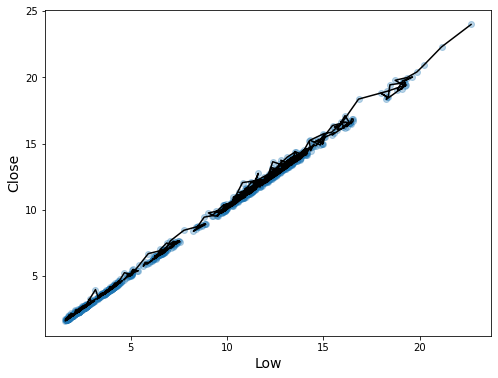

In [7]:
#define figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

#get y values
get_y = lambda a, b: a + b * X
y = get_y(model.params['Intercept'], model.params['X'])

#plot data points with quantile regression equation overlaid
ax.plot(X, Y, color='black')
ax.scatter(X, Y, alpha=.3)
ax.set_xlabel('Low', fontsize=14)
ax.set_ylabel('Close', fontsize=14)